### Data Quality Analysis

0. Reliable data sources
1. Duplicated data (Keys)
2. Missing Values
3. Wrongly data (mislabeled or wrongly entered)
4. Mis-aligned Times and Time zones
5. Formating
    Time
    Geo
    Names
6.

In [2]:
#Load Libraries
import pandas as pd
import numpy as np

In [3]:
#Fetch data 
df=pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv")
nyc=pd.read_csv("data/bus-breakdown-and-delays.csv")
stores=pd.read_csv("data/store-sales-time-series-forecasting/train.csv")

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
nyc

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,New Jersey,...,NaN,11,Yes,No,Yes,2015-11-05T08:12:00.000,NaN,2015-11-05T08:12:14.000,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,Manhattan,...,20MNS,2,Yes,Yes,No,2015-11-05T08:12:00.000,NaN,2015-11-05T08:13:34.000,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05T08:09:00.000,2015-11-05T08:13:00.000,Bronx,...,15MIN,8,Yes,Yes,Yes,2015-11-05T08:13:00.000,NaN,2015-11-05T08:13:22.000,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05T08:12:00.000,2015-11-05T08:14:00.000,Manhattan,...,15 MIN,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:04.000,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,2015-11-05T08:13:00.000,2015-11-05T08:14:00.000,Manhattan,...,NaN,6,No,No,No,2015-11-05T08:14:00.000,NaN,2015-11-05T08:14:08.000,Running Late,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379407,2018-2019,1565317,Pre-K/EI,2801,J47#5,Heavy Traffic,S047,2019-06-27T07:34:00.000,2019-06-27T07:37:00.000,Bronx,...,61-90 Min,3,Yes,Yes,No,2019-06-27T07:37:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K
379408,2018-2019,1565318,Pre-K/EI,9349,5,Heavy Traffic,C465,2019-06-27T08:03:00.000,2019-06-27T08:26:00.000,Bronx,...,16-30 Min,8,Yes,Yes,No,2019-06-27T08:26:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K
379409,2018-2019,1565319,Pre-K/EI,2616,NYM7,Heavy Traffic,E203,2019-06-27T11:40:00.000,2019-06-27T11:44:00.000,Bronx,...,0-15 Min,5,Yes,Yes,No,2019-06-27T11:44:00.000,NaN,1900-01-01T00:00:00.000,Running Late,Pre-K
379410,2018-2019,1565320,Special Ed AM Run,16412,K217,Other,"17333,17382,17448,17570,17669,17756",2019-06-27T13:18:00.000,2019-06-27T13:26:00.000,Brooklyn,...,0-15 Min,0,Yes,Yes,No,2019-06-27T13:26:00.000,NaN,1900-01-01T00:00:00.000,Running Late,School-Age


In [4]:
#Duplicated Data
nyc[nyc.duplicated()]
nyc[nyc.Busbreakdown_ID==1243404]

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
9991,2015-2016,1243404,Special Ed AM Run,2327,M476,Heavy Traffic,01461,2016-01-21T14:15:00.000,2016-01-21T14:19:00.000,Manhattan,...,20mins,0,Yes,Yes,Yes,2016-01-21T14:19:00.000,NaN,2016-01-21T14:19:51.000,Running Late,School-Age
10000,2015-2016,1243404,Special Ed AM Run,2327,M476,Heavy Traffic,01461,2016-01-21T14:15:00.000,2016-01-21T14:19:00.000,Manhattan,...,20mins,0,Yes,Yes,Yes,2016-01-21T14:19:00.000,NaN,2016-01-21T14:19:51.000,Running Late,School-Age


In [5]:
#The entered data is apt and according to the usage, but entered wrongly
wrong_data=nyc['How_Long_Delayed'].drop_duplicates().to_list()
wrong_data[:10]

[nan,
 '20MNS',
 '15MIN',
 '15 MIN',
 '30 min',
 '20MINS',
 '15',
 '30 mins',
 '20',
 '30 MINS']

In [6]:
stores['date']=pd.to_datetime(stores['date'])
Dates=stores['date'].drop_duplicates().count()
Total=(max(stores['date'])-min(stores['date'])).days

print("Number of days in the data: ", Dates, " Total days in the data: ", Total)

Number of days in the data:  1684  Total days in the data:  1687


In [7]:
#Time Zone
nyc['Informed_On']

0         2015-11-05T08:12:00.000
1         2015-11-05T08:12:00.000
2         2015-11-05T08:13:00.000
3         2015-11-05T08:14:00.000
4         2015-11-05T08:14:00.000
                   ...           
379407    2019-06-27T07:37:00.000
379408    2019-06-27T08:26:00.000
379409    2019-06-27T11:44:00.000
379410    2019-06-27T13:26:00.000
379411    2019-06-27T13:42:00.000
Name: Informed_On, Length: 379412, dtype: object

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df.isna().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

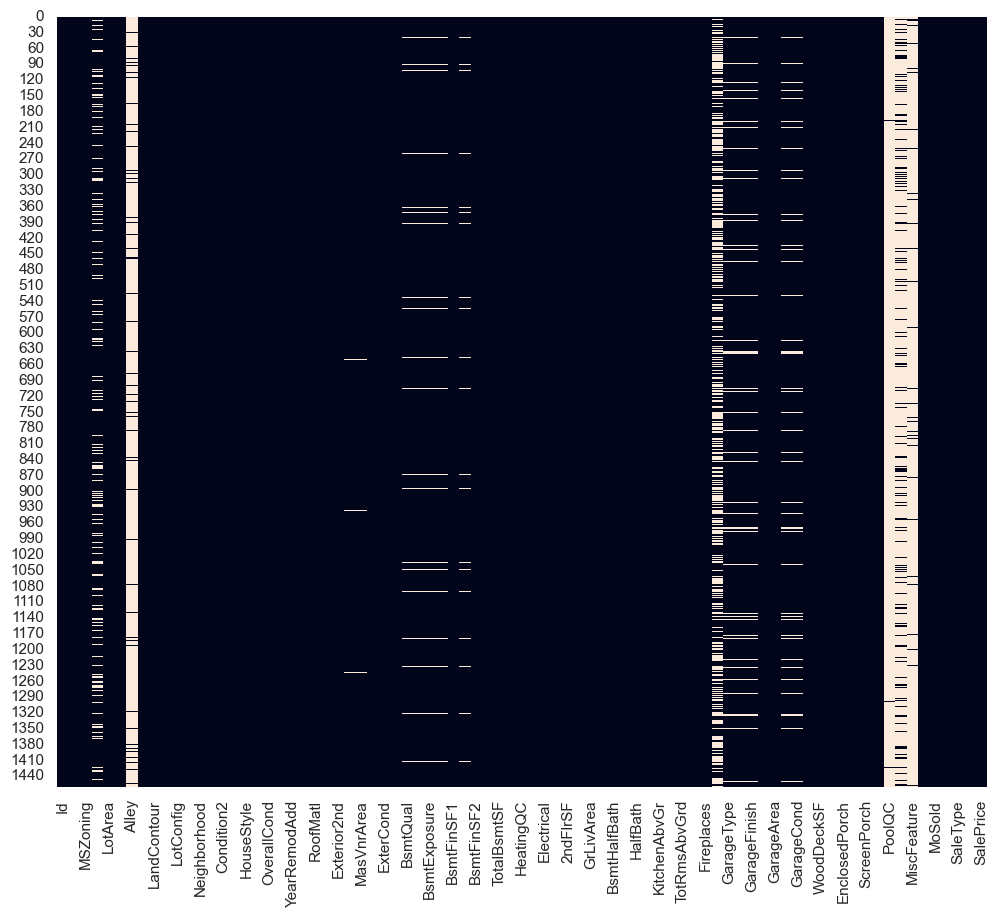

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,10)})

sns.heatmap(df.isnull(), cbar=False)
plt.show()